# 1. Imports & Read in Data

Die Rohdaten, die im CSV-Format vorliegen, müssen in das Feather-Dateiformat umgewandelt werden:

```python
import pandas as pd

# Einlesen der CSV Datei
example_data = pd.read_csv('example_data.csv')

# Umwandeln in das Feather Format
example_data.to_feather('example_data.feather')

In [148]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import pandas as pd
import re

In [149]:
file_path_asi = "data/Asien/raw_asien_tripfile.feather" 
file_path_eur = "data/Europa/raw_europa_tripfile.feather"
file_path_sud = "data/Suedamerika/raw_sudamerika_tripfile.feather"

In [150]:
# Zum Einlesen von Beispieldaten im csv Format
#data = pd.read_csv(file_path, delimiter=';', quotechar='"', engine='python') 

# Zum Einlesen von vollständingen Daten im csv Format
#data = pd.read_csv("data/Asien/ABCD_tripfiles.csv" , delimiter=',', quotechar='"', engine='python', on_bad_lines='skip')

In [193]:
data = pd.read_feather(file_path_sud)

# 2. Data Preprocessing 

Zusammenfassung:
- Der Datensatz wurde nach creation_time, dann id, dann flight_number sortiert.
- Die id-Spalte wurde entfernt.
- creation_time wurde als Indexspalte verwendet.
- Zeilen, bei denen alle Elemente fehlten, wurden entfernt.
- Verschiedene Gewichte wurden extrahiert, falls verfügbar.
- Die Spalten header_line und entry_details wurden entfernt.
- flight_number und flight_date wurden in Integer konvertiert.
- Land, Stadt und Flughafenname wurden hinzugefügt.

In [194]:
data.head()

,id,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
0,375119858,2024-04-30 04:22:41,ZY,6075.0,30.0,BVB,service-acco,AutomaticNotificationAction,"2024-04-30 04:22:41,144 INFO [3fc43b0d2af9531...",None
1,375119859,2024-04-30 04:22:41,ZY,6075.0,30.0,BVB,service-acco,AutomaticNotificationAction,"2024-04-30 04:22:41,146 INFO [3fc43b0d2af9531...",STATUS AIRCRAFT_CONFIG 1 EZFW 1 CARGO_FINAL 1 ...
2,375120627,2024-04-30 05:02:44,ZY,119.0,30.0,NAT,service-acco,AutomaticNotificationAction,"2024-04-30 05:02:44,524 INFO [f479b5e3ee955eb...",None
3,375120699,2024-04-30 04:17:43,ZY,5027.0,30.0,SSA,service-acco,AutoLoadBulkAction,"2024-04-30 04:17:43,876 INFO [a2561ff07178a19...",NULL\nLoaded pre-autoload state:\nPOSITIONS\nn...
4,375120700,2024-04-30 04:17:43,ZY,5027.0,30.0,SSA,service-acco,AssignLoadplanAction,"2024-04-30 04:17:43,877 INFO [a2561ff07178a19...",com.systemone.lc2.loadplan.dto.PositionAssignm...


In [195]:
data.tail()

,id,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
429790,375550590,2024-05-06 19:33:39,ZY,3783.0,6.0,VCP,service-acco,UpdateFlightAction,"2024-05-06 19:33:39,082 INFO [4427e686a061647...",Airline: ZY Flightnumber: 3783 Suf...
429791,375550593,2024-05-06 19:33:39,ZY,3783.0,6.0,VCP,service-acco,UpdateFlightAction,"2024-05-06 19:33:39,086 INFO [4427e686a061647...",Airline: ZY Flightnumber: 3783 Suf...
429792,375550600,2024-05-06 19:33:39,ZY,3783.0,6.0,VCP,service-acco,UpdateFlightAction,"2024-05-06 19:33:39,908 INFO [7b95ce90c6fd77e...",Airline: ZY Flightnumber: 3783 Suf...
429793,375550607,2024-05-06 19:33:39,ZY,3783.0,6.0,VCP,service-acco,UpdateFlightAction,"2024-05-06 19:33:39,918 INFO [7b95ce90c6fd77e...",Airline: ZY Flightnumber: 3783 Suf...
429794,375550619,2024-05-06 19:32:25,ZY,2213.0,29.0,REC,service-acco,UpdateFlightAction,"2024-05-06 19:32:25,134 INFO [f63074617969ba2...",Airline: ZY Flightnumber: 2213 Suf...


In [196]:
data.shape

(429795, 10)

In [197]:
data.dtypes

id                    object
creation_time         object
airline_code          object
flight_number        float64
flight_date          float64
departure_airport     object
user_name             object
action_name           object
header_line           object
entry_details         object
dtype: object

## 2.1. Sorting & Setting the Index

In [198]:
# Convert creation_time to datetime, handling errors by setting them as NaT
data['creation_time'] = pd.to_datetime(data['creation_time'], errors='coerce')

In [199]:
data.sort_values(by=['creation_time', "id", "flight_number"], inplace=True)

In [200]:
# Set creation_time as the index
data.set_index('creation_time', inplace=True)

In [201]:
#data = data.drop(columns=['id'])

In [202]:
data.head(20)

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
creation_time,,,,,,,,,
2024-04-30 04:15:11,375120560,ZY,5054.0,30.0,BEL,service-acco,PAXBOOKINGINMsgProcessor,"2024-04-30 04:15:11,032 INFO [d29421d5d634598...","<?xml version=""1.0"" encoding=""UTF-8""?><n:Passe..."
2024-04-30 04:15:11,375120561,ZY,5054.0,30.0,BEL,service-acco,EstimateStorePaxDataAction,"2024-04-30 04:15:11,034 INFO [d29421d5d634598...",com.systemone.lc2.paxactuals.dto.PaxDataDTO [ ...
2024-04-30 04:15:11,375120562,ZY,5054.0,30.0,BEL,service-acco,StorePaxDataAction,"2024-04-30 04:15:11,036 INFO [d29421d5d634598...",com.systemone.lc2.paxactuals.dto.PaxDataDTO [ ...
2024-04-30 04:15:11,375120563,ZY,5054.0,30.0,BEL,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:15:11,038 INFO [d29421d5d634598...",com.systemone.lc2.common.dto.SingleAttributeDT...
2024-04-30 04:15:11,375120564,ZY,5054.0,30.0,BEL,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:15:11,039 INFO [d29421d5d634598...",com.systemone.lc2.common.dto.SingleAttributeDT...
2024-04-30 04:15:11,375120565,ZY,5054.0,30.0,BEL,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:15:11,041 INFO [d29421d5d634598...",START_WI weight : 44456.00 KG ...
2024-04-30 04:15:11,375120566,ZY,5054.0,30.0,BEL,service-acco,CalculateWeightAndTrimAction,"2024-04-30 04:15:11,042 INFO [d29421d5d634598...",START_WI weight : 44456.00 KG ...
2024-04-30 04:15:11,375120567,ZY,5054.0,30.0,BEL,service-acco,StorePaxDataAction,"2024-04-30 04:15:11,044 INFO [d29421d5d634598...",TOTAL Pax: 22 Y: 22 Jump: 0 StandBy: NU...
2024-04-30 04:15:11,375122748,ZY,5054.0,30.0,BEL,service-acco,PAXBOOKINGINMsgProcessor,"2024-04-30 04:15:11,046 INFO [d29421d5d634598...",The message was processed successfully


## 2.2. Check for Missing Values

In [203]:
# Combine count and percentage of missing values
missing_summary = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage': data.isna().mean() * 100
})

print(missing_summary)

                   Missing Values  Percentage
id                              0    0.000000
airline_code                   40    0.009307
flight_number                  40    0.009307
flight_date                    40    0.009307
departure_airport              40    0.009307
user_name                      40    0.009307
action_name                    40    0.009307
header_line                    40    0.009307
entry_details               45154   10.505939


In [204]:
# Display rows with any missing values
data[data.isna().any(axis=1)]

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
creation_time,,,,,,,,,
2024-04-30 04:17:40,375122389,ZY,5414.0,30.0,SLZ,service-acco,SetCKIPaxDistributionAction,"2024-04-30 04:17:40,674 INFO [7b76f39b98d4d3e...",None
2024-04-30 04:17:41,375119852,ZY,6075.0,30.0,BVB,service-acco,SetActualBagWeightIndicatorAction,"2024-04-30 04:17:41,052 INFO [adb9d4f8365fde9...",None
2024-04-30 04:17:41,375120693,ZY,5027.0,30.0,SSA,service-acco,SetCKIPaxDistributionAction,"2024-04-30 04:17:41,978 INFO [e4476388a959da9...",None
2024-04-30 04:17:42,375122397,ZY,5414.0,30.0,SLZ,service-acco,AutoLoadBulkAction,"2024-04-30 04:17:42,209 INFO [b356daaa5d16c66...",None
2024-04-30 04:22:41,375119858,ZY,6075.0,30.0,BVB,service-acco,AutomaticNotificationAction,"2024-04-30 04:22:41,144 INFO [3fc43b0d2af9531...",None
...,...,...,...,...,...,...,...,...,...
NaT,TOTAL TRAFFIC LOZY 8815,None,NaN,NaN,None,None,None,None,None
NaT,TRIP FUEL 1910,None,NaN,NaN,None,None,None,None,None
NaT,UNDERLOZY BEFORE LMC 114 LM...,None,NaN,NaN,None,None,None,None,None


In [205]:
# Drop the rows where all elements are missing except for the id
data = data.dropna(how='all', subset=data.columns.difference(['id']))
#data = data.dropna(how='all')

In [206]:
# Convert flight_number and flight_date from object to integer
data['flight_number'] = data['flight_number'].astype(int)
data['flight_date'] = data['flight_date'].astype(int)

## 2.3. Extract Weights

In [208]:
# List of all keys, including weights, indices, and specific aircraft parameters
weight_keys = [
    "START_WI weight",  # Start weight in KG
    "START_WI index",  # Start index
    "DO_WI weight",  # Dry Operating Weight in KG
    "DO_WI index",  # Dry Operating Weight index
    "PAX_WI weight",  # Passenger weight in KG
    "PAX_WI index",  # Passenger weight index
    "TOTAL_DEADLOAD_WI weight",  # Total deadload weight in KG
    "TOTAL_DEADLOAD_WI index",  # Total deadload weight index
    "TOTAL_LOAD_WI",  # Total load weight in KG
    "TOTAL_TRAFFIC_LOAD",  # Total traffic load in KG
    "FUEL_INDEX",  # Fuel index
    "AZFW",  # Actual Zero Fuel Weight in KG
    "ATOW",  # Actual Takeoff Weight in KG
    "ALAW",  # Actual Landing Weight in KG
    "ATXW",  # Actual Taxi Weight in KG
    "AFT_LIMIT_ZFW",  # Aft limit for Zero Fuel Weight
    "FWD_LIMIT_ZFW",  # Forward limit for Zero Fuel Weight
    "AFT_LIMIT_TOW",  # Aft limit for Takeoff Weight
    "FWD_LIMIT_TOW",  # Forward limit for Takeoff Weight
    "AFT_LIMIT_LAW",  # Aft limit for Landing Weight
    "FWD_LIMIT_LAW",  # Forward limit for Landing Weight
    "LIZFW",  # Loaded Index at Zero Fuel Weight
    "LITOW",  # Loaded Index at Takeoff Weight
    "LILAW",  # Loaded Index at Landing Weight
    "MAC_AT_ZFW",  # Mean Aerodynamic Chord at Zero Fuel Weight
    "MAC_AT_TOW",  # Mean Aerodynamic Chord at Takeoff Weight
    "MAC_AT_LAW",  # Mean Aerodynamic Chord at Landing Weight
    "DEADLOAD_MAC",  # Deadload Mean Aerodynamic Chord
    "UNDERLOAD",  # Underload weight in KG
    "LIMITING_WEIGHT",  # Limiting weight
    "ALLOWED TOW",  # Allowed Takeoff Weight in KG
    "ALLOWED ZFW",  # Allowed Zero Fuel Weight in KG
    "ALLOWED LAW",  # Allowed Landing Weight in KG
    "ALLOWED TXW",  # Allowed Taxi Weight in KG
    "STABTO",  # Stabilizer position at takeoff
    "OPTIMAL_TRIM",  # Optimal trim setting
    "IDEAL_ADDITIONAL_LOAD_AFT",  # Ideal additional load aft in KG
    "IDEAL_ADDITIONAL_LOAD_FWD",  # Ideal additional load forward in KG
    "TAIL_TIPPING_WI weight",  # Tail tipping weight in KG
    "TAIL_TIPPING_WI index",  # Tail tipping index
    "TAIL_TIPPING_INDEX_EXCEEDED",  # Tail tipping index exceeded flag
    "FWD_MOVABLE_PAX",  # Forward movable passengers
    "AFT_MOVABLE_PAX",  # Aft movable passengers
    "INDEX_OUT_OF_BALANCE",  # Index out of balance flag
    "LOAD_TO_AFT",  # Load to aft
    "LOAD_TO_FWD",  # Load to forward
    "ESTIMATED_TRAFFIC_LOAD",  # Estimated traffic load in KG
    "ESTIMATED_ZFW",  # Estimated Zero Fuel Weight in KG
    "DELTA_ZFW",  # Delta Zero Fuel Weight in KG
    "ZFW_TOLERANCE_EXCEEDED",  # Zero Fuel Weight tolerance exceeded flag
    "Total bag weight"  # Total baggage weight in KG
]

# Create the regex pattern dynamically from the list of keys
pattern = rf'({"|".join(map(re.escape, weight_keys))})\s*:\s*([0-9.]+)'

# Define a function to extract the relevant details
def extract_weight_details(data_string):
    extracted_data = re.findall(pattern, data_string)
    return {key.strip(): float(value) for key, value in extracted_data}

# Apply the function to the 'entry_details' column
data['extracted_data'] = data['entry_details'].astype(str).apply(extract_weight_details)

# Convert extracted dictionary into separate columns
for key in weight_keys:
    data[key] = data['extracted_data'].apply(lambda x: x.get(key, None))

In [209]:
# Select all columns except for header_line, entry_details and extracted_data
columns_to_use = [col for col in data.columns if col not in ['header_line', 'entry_details', "extracted_data"]]
data_cleaned = data[columns_to_use]

## 2.4. Add Country, City and Airport Name

##### Using openflights (https://openflights.org/data), data is only till 2017! So it will not be used

In [629]:
# Load the airport data (this data till 2017 !!)
#airport_data = pd.read_csv('data/airports.txt', header=None, 
#                           names=['airport_id', 'name', 'city', 'country', 'iata', 'icao', 'latitude', 
#                                  'longitude', 'altitude', 'timezone', 'dst', 'tz_database_time_zone', 'type', 'source'])

In [630]:
#airport_data.head()

In [631]:
# Select only relevant columns
#airport_data = airport_data[['iata', 'name', 'city', 'country']]
#airport_data.columns = ['departure_airport', 'airport_name', 'city', 'country']

#airport_data.head()

In [632]:
# Merge with airport_data to add airport name, city, and country
#data_enriched = data_cleaned.merge(airport_data, on='departure_airport', how='left')

In [633]:
#data_enriched.head()

#### Using ourairports (https://ourairports.com/data/)

In [211]:
# Load the airport data (last modified May 30, 2024)
ourairports_data = pd.read_csv('data/ourairports.csv')

In [212]:
ourairports_data.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN


In [213]:
# Select only relevant columns
ourairports_data = ourairports_data[['iata_code', 'name', 'municipality', 'iso_country', "iso_region"]]
ourairports_data.columns = ['departure_airport', 'airport_name', 'city', 'country', "region"]

print(ourairports_data.head())

  departure_airport          airport_name          city country region
0               NaN     Total RF Heliport      Bensalem      US  US-PA
1               NaN  Aero B Ranch Airport         Leoti      US  US-KS
2               NaN          Lowell Field  Anchor Point      US  US-AK
3               NaN          Epps Airpark       Harvest      US  US-AL
4               NaN  Katmai Lodge Airport   King Salmon      US  US-AK


### Data must be adjusted because of the merge

In [214]:
data_cleaned_reset = data_cleaned.reset_index()

In [215]:
data_cleaned_reset

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,FWD_MOVABLE_PAX,AFT_MOVABLE_PAX,INDEX_OUT_OF_BALANCE,LOAD_TO_AFT,LOAD_TO_FWD,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight
0,2024-04-30 04:15:11,375120560,ZY,5054,30,BEL,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
1,2024-04-30 04:15:11,375120561,ZY,5054,30,BEL,service-acco,EstimateStorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
2,2024-04-30 04:15:11,375120562,ZY,5054,30,BEL,service-acco,StorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
3,2024-04-30 04:15:11,375120563,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
4,2024-04-30 04:15:11,375120564,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429750,2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,None,None,13.46,None,None,None,30216.0,0.0,None,NaN
429751,2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
429752,2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,None,None,13.46,None,None,None,30180.0,0.0,None,NaN
429753,2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,0.0


In [216]:
# Perform the merge
data_enriched_full = data_cleaned_reset.merge(ourairports_data, on='departure_airport', how='left')

In [217]:
data_cleaned_reset

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,FWD_MOVABLE_PAX,AFT_MOVABLE_PAX,INDEX_OUT_OF_BALANCE,LOAD_TO_AFT,LOAD_TO_FWD,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight
0,2024-04-30 04:15:11,375120560,ZY,5054,30,BEL,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
1,2024-04-30 04:15:11,375120561,ZY,5054,30,BEL,service-acco,EstimateStorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
2,2024-04-30 04:15:11,375120562,ZY,5054,30,BEL,service-acco,StorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
3,2024-04-30 04:15:11,375120563,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
4,2024-04-30 04:15:11,375120564,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429750,2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,None,None,13.46,None,None,None,30216.0,0.0,None,NaN
429751,2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,NaN
429752,2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,None,None,13.46,None,None,None,30180.0,0.0,None,NaN
429753,2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,None,None,NaN,None,None,None,NaN,NaN,None,0.0


In [218]:
# Convert creation_time to datetime, handling errors by setting them as NaT
data_enriched_full['creation_time'] = pd.to_datetime(data_enriched_full['creation_time'], errors='coerce')

data_enriched_full.sort_values(by=['creation_time', "flight_number"], inplace=True)

# Set 'creation_time' as the index
data_enriched_full.set_index('creation_time', inplace=True)

In [219]:
data_enriched_full

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,LOAD_TO_FWD,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,country,region
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-04-30 04:15:11,375120560,ZY,5054,30,BEL,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA
2024-04-30 04:15:11,375120561,ZY,5054,30,BEL,service-acco,EstimateStorePaxDataAction,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA
2024-04-30 04:15:11,375120562,ZY,5054,30,BEL,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA
2024-04-30 04:15:11,375120563,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA
2024-04-30 04:15:11,375120564,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,None,None,30216.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP
2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,NaN,...,None,None,NaN,NaN,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP
2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,None,None,30180.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP


## Country ISO Code to Full Country Name

In [220]:
countries = pd.read_csv('data/countries.csv')

In [221]:
countries.head()

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,Andorran airports
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,Antiguan airports
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [222]:
# Select only relevant columns
countries = countries[['code', 'name', 'continent']]
countries.columns = ['country', 'country_name', 'continent']

countries.head()

,country,country_name,continent
0,AD,Andorra,EU
1,AE,United Arab Emirates,AS
2,AF,Afghanistan,AS
3,AG,Antigua and Barbuda,NaN
4,AI,Anguilla,NaN


In [223]:
data_enriched_full = data_enriched_full.reset_index()

In [224]:
data_enriched_full = data_enriched_full.merge(countries, on='country', how='left')

In [225]:
data_enriched_full

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,country,region,country_name,continent
0,2024-04-30 04:15:11,375120560,ZY,5054,30,BEL,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,...,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA,Brazil,SA
1,2024-04-30 04:15:11,375120561,ZY,5054,30,BEL,service-acco,EstimateStorePaxDataAction,NaN,NaN,...,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA,Brazil,SA
2,2024-04-30 04:15:11,375120562,ZY,5054,30,BEL,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA,Brazil,SA
3,2024-04-30 04:15:11,375120563,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA,Brazil,SA
4,2024-04-30 04:15:11,375120564,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR,BR-PA,Brazil,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429750,2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,30216.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP,Brazil,SA
429751,2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,NaN,NaN,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP,Brazil,SA
429752,2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,30180.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR,BR-SP,Brazil,SA
429753,2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,NaN,None,0.0,Viracopos International Airport,Campinas,BR,BR-SP,Brazil,SA


In [226]:
# Convert creation_time to datetime, handling errors by setting them as NaT
data_enriched_full['creation_time'] = pd.to_datetime(data_enriched_full['creation_time'], errors='coerce')

data_enriched_full.sort_values(by=['creation_time', "flight_number"], inplace=True)

# Set 'creation_time' as the index
data_enriched_full.set_index('creation_time', inplace=True)

In [227]:
data_enriched_full = data_enriched_full.drop(columns=["country"])

In [228]:
data_enriched_full

,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,DO_WI weight,...,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent
creation_time,,,,,,,,,,,,,,,,,,,,,
2024-04-30 04:15:11,375120560,ZY,5054,30,BEL,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR-PA,Brazil,SA
2024-04-30 04:15:11,375120561,ZY,5054,30,BEL,service-acco,EstimateStorePaxDataAction,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR-PA,Brazil,SA
2024-04-30 04:15:11,375120562,ZY,5054,30,BEL,service-acco,StorePaxDataAction,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR-PA,Brazil,SA
2024-04-30 04:15:11,375120563,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR-PA,Brazil,SA
2024-04-30 04:15:11,375120564,ZY,5054,30,BEL,service-acco,CalculateWeightAndTrimAction,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Val de Cans/Júlio Cezar Ribeiro International ...,Belém,BR-PA,Brazil,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,None,30216.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,29946.0,...,None,30180.0,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA


## 2.5. Export Final Data

In [229]:
# To Feather
#data_enriched_full.to_feather("data/Asien/AB_cleaned.feather")
#data_enriched_full.to_feather("data/Europa/MN_cleaned.feather")
#data_enriched_full.to_feather("data/Suedamerika/ZY_cleaned.feather")

In [230]:
# To CSV file with the creation time as a column
#data_enriched_full.to_csv('data/Asien/AB_cleaned.csv', index=True)
#data_enriched_full.to_csv("data/Europa/MN_cleaned.csv", index=True)
#data_enriched_full.to_csv("data/Suedamerika/ZY_cleaned.csv", index=True)

In [2]:
# Merge data

# Pfade zu den drei CSV-Dateien
asia = "data/Asien/AB_cleaned.csv"
eur = "data/Europa/MN_cleaned.csv"
sud = "data/Suedamerika/ZY_cleaned.csv"

# Laden der CSV-Dateien
df1 = pd.read_csv(asia)
df2 = pd.read_csv(eur)
df3 = pd.read_csv(sud)

# Zusammenführen der Daten
merged_df = pd.concat([df1, df2, df3])

# Speichern der zusammengeführten Daten in eine neue CSV-Datei
output_file = "data/merged_airlines.csv"
merged_df.to_csv(output_file, index=True)

# 3. Data Analysis

In [3]:
analy = pd.read_csv("merged_airlines.csv")

In [6]:
analy

,Unnamed: 0,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent
0,0,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
1,1,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
2,2,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
3,3,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,...,15915.44,60710.44,NaN,NaN,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS
4,4,2024-04-30 04:01:00,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,NaN,NaN,NaN,1571.0,Bagdogra Airport,Siliguri,IN-WB,India,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248294,429750,2024-05-07 09:20:24,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,NaN,30216.00,0.0,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2248295,429751,2024-05-07 09:20:24,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2248296,429752,2024-05-07 09:20:24,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,NaN,30180.00,0.0,NaN,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA
2248297,429753,2024-05-07 09:20:24,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Viracopos International Airport,Campinas,BR-SP,Brazil,SA


## 3.1. Understanding the Data

In [654]:
data_enriched_full["airline_code"].unique()

array(['ZY'], dtype=object)

In [655]:
data_enriched_full["flight_number"].unique()

array([5054, 3936, 5079, ..., 9902, 2213, 2414])

In [656]:
data_enriched_full["departure_airport"].unique()

array(['BEL', 'SDU', 'VCP', 'SLZ', 'SSA', 'GRU', 'BVB', 'CGH', 'IMP',
       'MCZ', 'REC', 'NAT', 'CGB', 'GYN', 'POA', 'VIX', 'CWB', 'IPN',
       'IGU', 'GIG', 'PVH', 'MOC', 'BSB', 'MAO', 'CGR', 'PPB', 'UDI',
       'CNF', 'FLN', 'PNZ', 'RAO', 'MCO', 'BPS', 'XAP', 'CPV', 'SJP',
       'FLL', 'FOR', 'LDB', 'JTC', 'MGF', 'JPA', 'JOI', 'JDO', 'AJU',
       'NVT', 'STM', 'THE', 'ORY', 'FEN', 'LIS', 'CAC', 'VDC', 'UBA',
       'ARU', 'IZA', 'PFB', 'CMG', 'CAW', 'URG', 'BYO', 'CKS', 'LEC',
       'SJL', 'MAB', 'MII', 'BVH', 'OAL', 'OPS', 'MCP', 'EEA', 'IOS',
       'PET', 'PMW', 'CFB', 'ITB', 'TFF', 'GVR', 'MVF', 'RVD', 'GNM',
       'BRA', 'FEC', 'GPB', 'AAX', 'JJG', 'PGZ', 'PTO', 'PMG', 'ROO',
       'SMT', 'MVD', 'CXJ', 'AFL', 'RBB', 'PAV', 'ATM', 'PIN', 'MEU',
       'LHN', 'VAG', 'TFL', 'GEL', 'TJL', 'RIA', 'TBT', 'RBR', 'MNX',
       'MDZ', 'POJ', 'ERN', 'JPR', 'CLV', 'UNA', 'PDP', 'CUR', 'PHB',
       'HAM', 'ARX', 'RVY', 'JJD', 'BRB', 'TMT', 'SOD', 'SSV'],
      dtype=object)

In [657]:
data_enriched_full["action_name"].unique()

array(['PAXBOOKINGINMsgProcessor', 'EstimateStorePaxDataAction',
       'StorePaxDataAction', 'CalculateWeightAndTrimAction',
       'SetCKIPaxDistributionAction', 'CargoFinalActionTDM',
       'SetActualBagWeightIndicatorAction', 'AutoLoadBulkAction',
       'AssignLoadplanAction', 'CreateBaggageLoadItemsAction',
       'AutomaticNotificationAction', 'CreateZFWMessageAction',
       'CrewMsgProcessor', 'UpdateCrewDataAction', 'AutoLoadULDAction',
       'UpdateFlightAction', 'AssignLCCAction',
       'AssignUnassignViewAction', 'GetCabinConfigurationsAction',
       'StoreRegistrationAndConfigurationAc', 'TransferCargoAction',
       'StoreAircraftDataAction', 'SpecialPaxWeightAction',
       'UpdateLoadTableAction', 'StorePaxDataGuiAction',
       'UpdateSupplementaryInfoAction', 'UpdateFuelDataAction',
       'CreateLoadingInstructionAction', 'RampFinalAction',
       'CreateLoadsheetAction', 'FuelDataInitializer', 'CargoFinalAction',
       'AcceptTransitDataAction', 'AcceptTransit

In [658]:
data_enriched_full["country_name"].unique()

array(['Brazil', 'United States', 'France', 'Portugal', 'Uruguay',
       'Argentina', 'Curaçao', 'Germany', 'Namibia'], dtype=object)

In [659]:
data_enriched_full["city"].unique()

array(['Belém', 'Rio de Janeiro', 'Campinas', 'São Luís', 'Salvador',
       'São Paulo', 'Boa Vista', 'Imperatriz', 'Maceió', 'Recife',
       'Natal', 'Cuiabá', 'Goiânia', 'Porto Alegre', 'Vitória',
       'Curitiba', 'Ipatinga', 'Foz do Iguaçu', 'Rio De Janeiro',
       'Porto Velho', 'Montes Claros', 'Brasília', 'Manaus',
       'Campo Grande', 'Presidente Prudente', 'Uberlândia',
       'Belo Horizonte', 'Florianópolis', 'Petrolina', 'Ribeirão Preto',
       'Orlando', 'Porto Seguro', 'Chapecó', 'Campina Grande',
       'São José do Rio Preto', 'Fort Lauderdale', 'Fortaleza',
       'Londrina', 'Bauru', 'Maringá', 'João Pessoa', 'Joinville',
       'Juazeiro do Norte', 'Aracaju', 'Navegantes', 'Santarém',
       'Teresina', 'Paris', 'Fernando de Noronha', 'Lisbon', 'Cascavel',
       'Vitória da Conquista', 'Uberaba', 'Araçatuba', 'Juiz de Fora',
       'Passo Fundo', 'Corumbá', 'Campos Dos Goytacazes', 'Uruguaiana',
       'Bonito', 'Parauapebas', 'Lençóis', 'São Gabriel da Cacho

In [660]:
data_enriched_full["airport_name"].unique()

array(['Val de Cans/Júlio Cezar Ribeiro International Airport',
       'Santos Dumont Airport', 'Viracopos International Airport',
       'Marechal Cunha Machado International Airport',
       'Deputado Luiz Eduardo Magalhães International Airport',
       'Guarulhos - Governador André Franco Montoro International Airport',
       'Atlas Brasil Cantanhede Airport', 'Congonhas Airport',
       'Prefeito Renato Moreira Airport', 'Zumbi dos Palmares Airport',
       'Recife/Guararapes - Gilberto Freyre International Airport',
       'São Gonçalo do Amarante - Governador Aluízio Alves International Airport',
       'Marechal Rondon Airport', 'Santa Genoveva Airport',
       'Salgado Filho International Airport',
       'Eurico de Aguiar Salles Airport', 'Afonso Pena Airport',
       'Usiminas Airport', 'Cataratas International Airport',
       'Rio Galeão – Tom Jobim International Airport',
       'Governador Jorge Teixeira de Oliveira Airport',
       'Mário Ribeiro Airport',
       'Pres

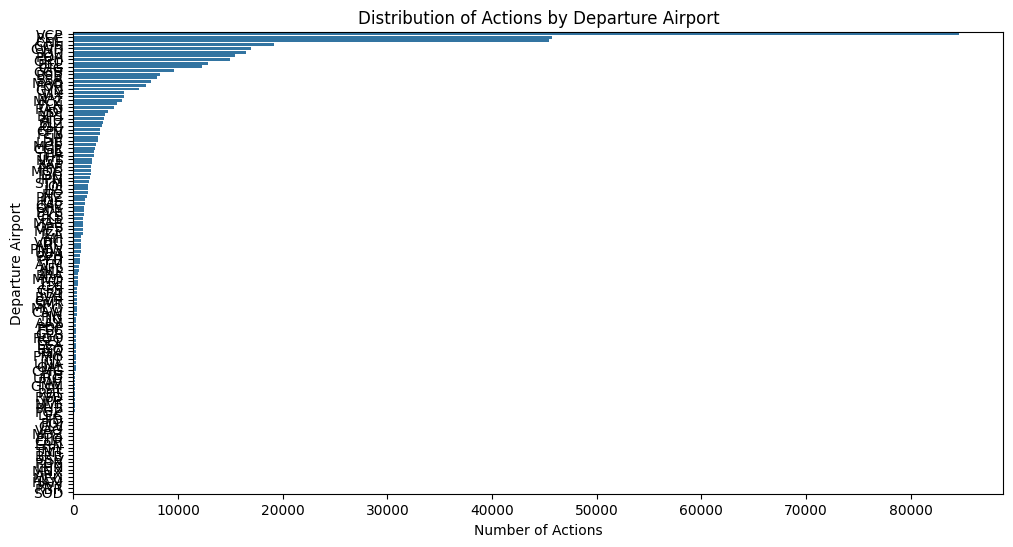

In [661]:
# Plot the distribution of departure airports
plt.figure(figsize=(12, 6))
sns.countplot(y='departure_airport', data=data_enriched_full, order=data_enriched_full['departure_airport'].value_counts().index)
plt.title('Distribution of Actions by Departure Airport')
plt.ylabel('Departure Airport')
plt.xlabel('Number of Actions')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

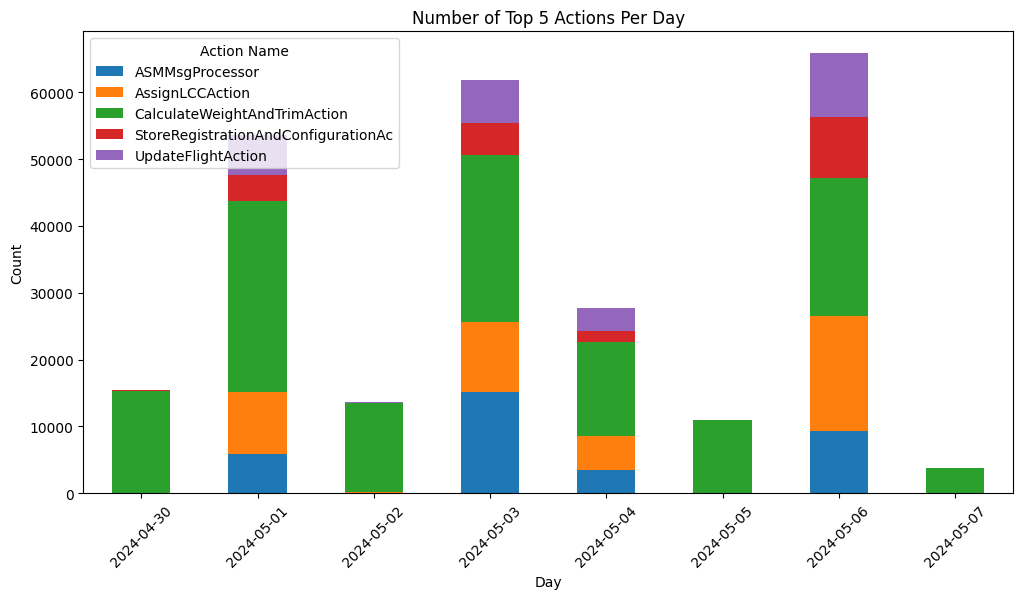

In [662]:
# Identify the top 5 most occurring actions
top_actions = data_enriched_full['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
filtered_data = data_enriched_full[data_enriched_full['action_name'].isin(top_actions)]

# Resample data to day and sum the action counts
action_counts = filtered_data.groupby([filtered_data.index.date, 'action_name']).size().unstack(fill_value=0)

# Plot number of actions per day for the top 5 actions
plt.figure(figsize=(12, 6))
action_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Top 5 Actions Per Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Action Name')
plt.xticks(rotation=45)
plt.show()

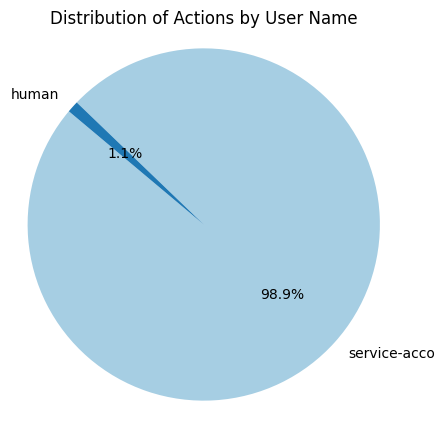

In [663]:
# Count the occurrences of each user_name
user_counts = data_enriched_full['user_name'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Actions by User Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

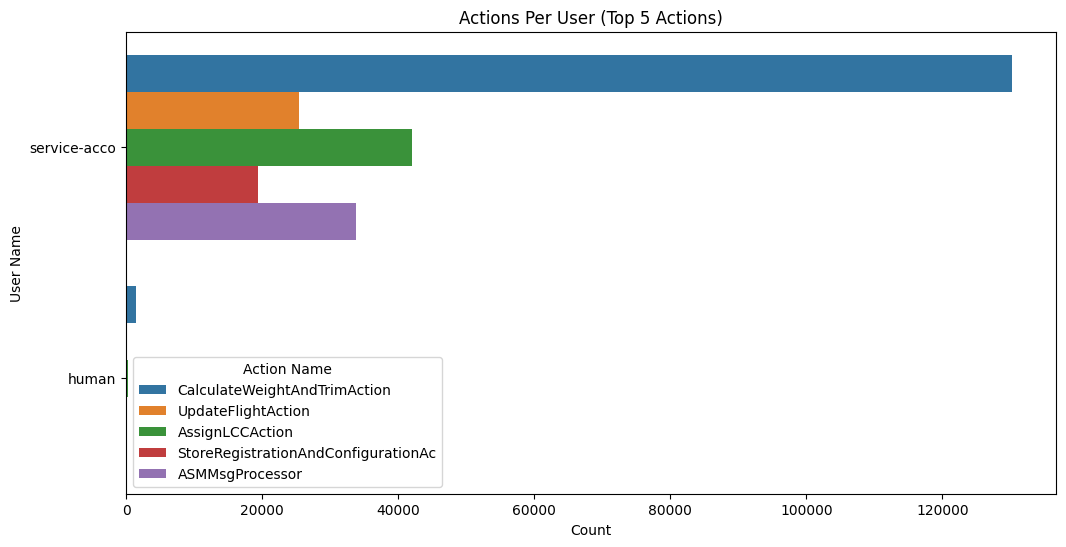

In [664]:
# Identify the top 5 most occurring actions
top_actions = data_enriched_full['action_name'].value_counts().nlargest(5).index

# Filter data_cleaned to include only the top 5 actions
filtered_data = data_enriched_full[data_enriched_full['action_name'].isin(top_actions)]

# Plot actions per user for the top 5 actions
plt.figure(figsize=(12, 6))
sns.countplot(y='user_name', hue='action_name', data=filtered_data)
plt.title('Actions Per User (Top 5 Actions)')
plt.xlabel('Count')
plt.ylabel('User Name')
plt.legend(title='Action Name')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


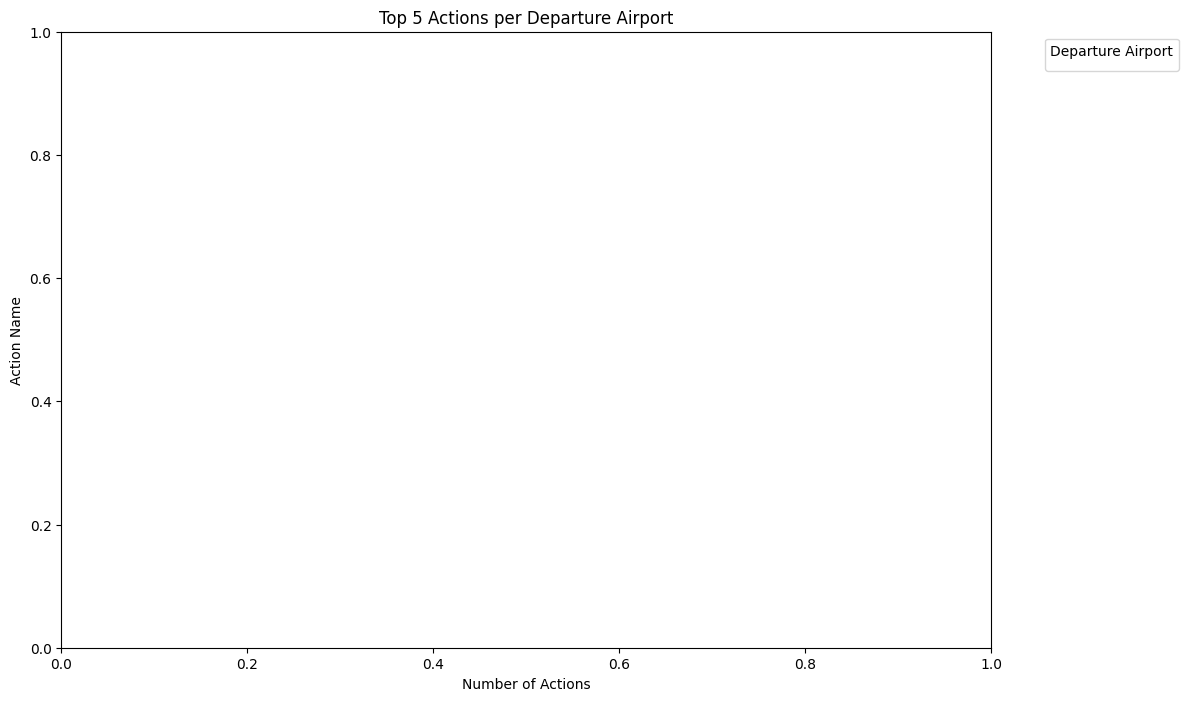

In [665]:
# Filter for two specific departure airports
filtered_airports = ['DUS', 'JFK']
df_filtered = data_enriched_full[data_enriched_full['departure_airport'].isin(filtered_airports)]

# Group by departure_airport and action_name, then count occurrences
action_counts = df_filtered.groupby(['departure_airport', 'action_name']).size().reset_index(name='count')

# Sort the counts in descending order and select the top 5 actions per departure_airport
top_actions = action_counts.sort_values(['departure_airport', 'count'], ascending=[True, False]).groupby('departure_airport').head(5)

# Visualize the top 5 actions per departure_airport
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='action_name', hue='departure_airport', data=top_actions, dodge=True)
plt.title('Top 5 Actions per Departure Airport')
plt.xlabel('Number of Actions')
plt.ylabel('Action Name')
plt.legend(title='Departure Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3.2. Time Series Forecasting

In [ ]:
"""
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
# Replace 'your_data.csv' with your actual csv file
df = pd.read_csv('your_data.csv')

# Preprocessing
# Assume 'Date' is the column containing dates and 'ATOW' is what you want to predict
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the data
train = df[df.index < '2020-01-01']
test = df[df.index >= '2020-01-01']

# Define the model
model = ARIMA(train['ATOW'], order=(5,1,0))

# Fit the model
model_fit = model.fit(disp=0)

# Make predictions
predictions = model_fit.forecast(steps=len(test))[0]

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['ATOW'], predictions))
print('Test RMSE: %.3f' % rmse)
"""

In [ ]:
"""
import matplotlib.pyplot as plt

# Existing code...

# Make predictions
predictions = model_fit.forecast(steps=len(test))[0]

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(test.index, test['ATOW'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted ATOW')
plt.xlabel('Date')
plt.ylabel('ATOW')
plt.legend()
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['ATOW'], predictions))
print('Test RMSE: %.3f' % rmse)
"""

In [ ]:
"""
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate error metrics
mae = mean_absolute_error(test['ATOW'], predictions)
mse = mean_squared_error(test['ATOW'], predictions)
rmse = sqrt(mse)  # or `rmse = mean_squared_error(test['ATOW'], predictions, squared=False)`
mape = np.mean(np.abs((test['ATOW'] - predictions) / test['ATOW'])) * 100

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAPE: {mape:.3f}%')
"""